In [1]:
# Importamos las librerías que vamos a necesitar
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Importamos los archivos CSV
df_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
df_locations = pd.read_csv('/datasets/project_sql_result_04.csv')

In [4]:
# Mostramos las primeras filas para ver el contenido
print("Datos de compañís de taxi:")
print(df_companies.head())

print("\nDatos de ubicaciones donde finalizaron los viajes:")
print(df_locations.head())

Datos de compañís de taxi:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

Datos de ubicaciones donde finalizaron los viajes:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


In [5]:
# Vamos a verificar el tipo de datos y si hay valores nulos
print("\nTipos de datos de df_companies:")
print(df_companies.info())

print("\nTipos de datos de df_locations:")
print(df_locations.info())


Tipos de datos de df_companies:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

Tipos de datos de df_locations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [6]:
# Identificamos los 10 barrios principales por número promedio de finalizaciones 
top_10_locations = df_locations.sort_values(by='average_trips', ascending=False).head(10)
print("\nTop 10 barrios por número promedio de finalizaciones:")
print(top_10_locations)


Top 10 barrios por número promedio de finalizaciones:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


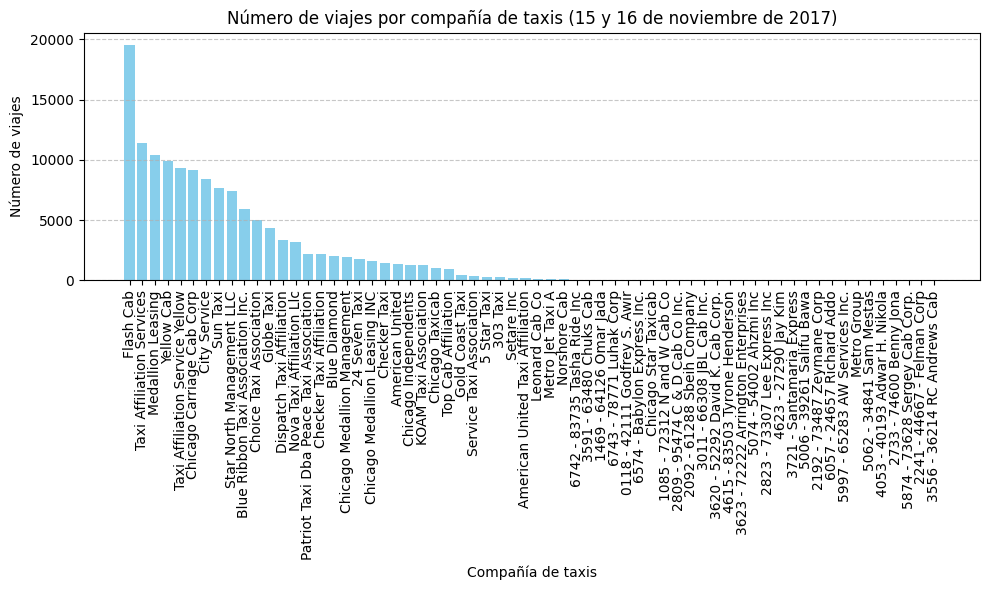

In [9]:
# Grafico de compañías de taxi y número de viajes
plt.figure(figsize=(10, 6))
plt.bar(df_companies['company_name'], df_companies['trips_amount'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Compañía de taxis')
plt.ylabel('Número de viajes')
plt.title('Número de viajes por compañía de taxis (15 y 16 de noviembre de 2017)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

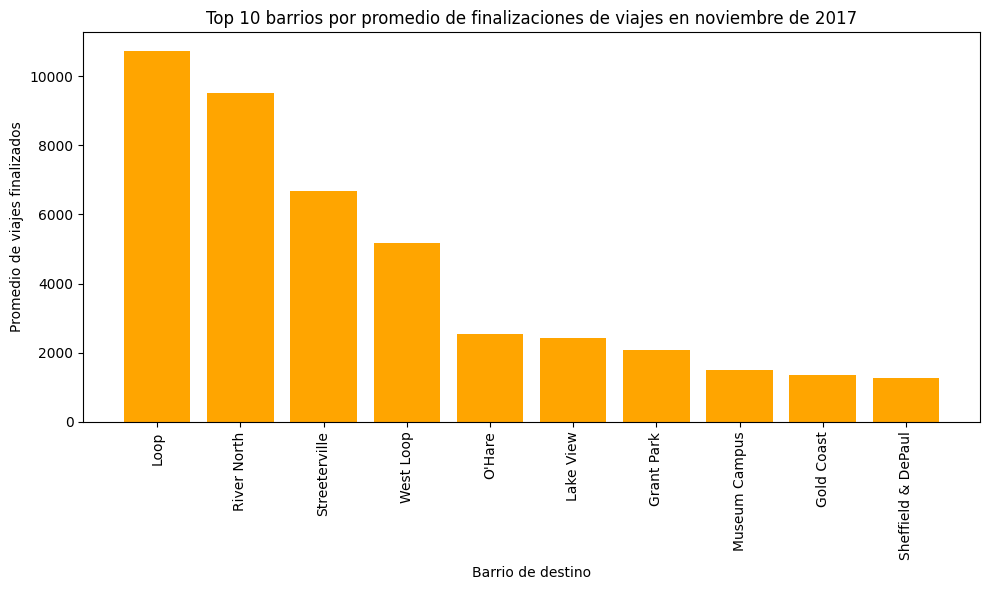

In [8]:
# Grafico del top 10 de barrios por número promedi de finalizaciones
plt.figure(figsize=(10, 6))
plt.bar(top_10_locations['dropoff_location_name'], top_10_locations['average_trips'], color='orange')
plt.xticks(rotation=90)
plt.xlabel('Barrio de destino')
plt.ylabel('Promedio de viajes finalizados')
plt.title('Top 10 barrios por promedio de finalizaciones de viajes en noviembre de 2017')
plt.tight_layout()
plt.show()

# Conclusiones basadas en cada gráfico

## Gráfico de compañías
Observamos que unas pocas compañías concentran la mayor cantidad de viajes.
En particular, tres de ellas superan los 10,000 viajes, siendo Flash Cab la más destacada con casi 20,000 viajes en solo dos días (15 y 16 de noviembre de 2017). Su competidor más cercano, Taxi Affiliation Services, tiene poco más de 10,000 viajes.

Esto indica que el mercado está claramente dominado por una compañía, con una participación muy superior respecto a las demás.
También encontramos un segundo grupo de alrededor de 7 compañías que registran entre 5,000 y 10,000 viajes, y finalmente, el resto de las empresas tienen menos de 5,000 viajes.
Este comportamiento refleja una concentración del mercado, donde unas pocas compañías capturan la mayor parte de la demanda.

## Gráfico de barrios
Vemos que ciertos barrios tienen significativamente más finalizaciones de viajes que otros.
Destacan especialmente Loop y River North, ambos con más de 8,000 finalizaciones en promedio durante noviembre de 2017.

Loop es conocido por ser el distrito de negocios más importante de Chicago, lo cual explica por qué concentra el mayor número de viajes finalizados: es un área con alto flujo de trabajadores, turistas y visitantes diarios.
Por su parte, River North, que se encuentra muy cerca de Loop, es famoso por sus galerías de arte, vida nocturna, restaurantes y tiendas exclusivas, atrayendo también un gran volumen de pasajeros.

En tercer lugar aparece Streeterville, con poco más de 6,000 finalizaciones. Aunque es principalmente una zona residencial, tiene un ambiente dinámico y urbano que puede atraer tanto a residentes como a visitantes.

En general, esto refleja que los barrios con mayor actividad comercial, turística o residencial son los principales destinos finales para los viajes en taxi.

In [10]:
# Vamos a importar una librería más para la prueba de hipótesis
from scipy import stats

In [11]:
# Leemos el archivo CSV
df_trips_weather = pd.read_csv('/datasets/project_sql_result_07.csv')

In [12]:
# Mostramos las primeras filas para ver los datos
print(df_trips_weather.head())

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


In [13]:
# Revisamos la información general
print(df_trips_weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None


**Hipótesis:**

Queremos comprobar si la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

- Hipótesis nula (H₀): la duración promedio de los viajes es la misma en sábados lluviosos ("Bad") y en sábados sin lluvia ("Good").
- Hipótesis alternativa (H₁): la duración promedio de los viajes es diferente entre sábados lluviosos ("Bad") y sábados sin lluvia ("Good").

**Nivel de significación:**
- Establecemos alfa = 0.05 (5%).

**Criterio:**
- Utilizaremos la prueba *t de Student* para muestras independientes (scipy.stats.ttest_ind), porque queremos comparar las medias de dos grupos ("Bad" vs "Good").
- Si el valor p obtenido es menor que alfa, rechazamos la hipótesis nula.


In [14]:
# Crear subconjuntos para los dos grupos de clima: 'Bad' (lluvia o tormenta) y 'Good' (clima bueno)
bad_weather = df_trips_weather[df_trips_weather['weather_conditions'] == 'Bad']['duration_seconds']
good_weather = df_trips_weather[df_trips_weather['weather_conditions'] == 'Good']['duration_seconds']

In [15]:
# Verificamos los datos que tenemos en cada grupo
print("Número de viajes en sábados lluviosos:", len(bad_weather))
print("Número de viajes en sábados sin lluvia:", len(good_weather))

Número de viajes en sábados lluviosos: 180
Número de viajes en sábados sin lluvia: 888


In [16]:
# Calculamos las medias de cada grupo
print("Duración promedio (Bad):", bad_weather.mean())
print("Duración promedio (Good):", good_weather.mean())

Duración promedio (Bad): 2427.2055555555557
Duración promedio (Good): 1999.6756756756756


In [17]:
# Ejecutamos la prueba t de Student para muestras independientes
t_stat, p_value = stats.ttest_ind(bad_weather, good_weather, equal_var=False)

print("\nEstadístico t:", t_stat)
print("Valor p:", p_value)


Estadístico t: 7.186034288068629
Valor p: 6.738994326108734e-12


**Conclusiones:**

- Nivel de significación establecido: α = 0.05.
- Valor p obtenido ≈ 6.74e-12, que es muchísimo menor que α (0.05).
- Como el valor p es significativamente menor que el nivel de significación, **rechazamos la hipótesis nula**.

Esto indica que **existe una diferencia estadísticamente significativa en la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare entre los sábados lluviosos y los sábados con buen clima**.

Observamos que la duración promedio de los viajes en sábados lluviosos (2427 segundos) es considerablemente mayor que en sábados sin lluvia (1999 segundos).  
Esto sugiere que el mal clima (lluvia o tormenta) puede provocar un aumento en el tiempo de los trayectos, posiblemente debido al tráfico, reducción de velocidad o condiciones adversas en la carretera.
